### Automated Classification of Media Content (Books and Movies) as Violent or Not

### Purpose: Visualization of Violent words Glove Embeddings using t-SNE

#### Input: "data_for_model.pkl" Output: Graphs plotted inline

### Importing  Packages

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import re
import os
import pickle

########################################### For NLTK #########################################

import nltk # NLTK for NLP utils and corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet


############################################SCIKIT-LEARN#######################################

# SK-learn libraries for learning.
from sklearn.linear_model import LogisticRegression

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import * 
# This tells matplotlib not to try opening a new window for each plot.

############################################UTILS##################################################

import json, shutil, sys, time
from importlib import reload
import collections, itertools
import unittest
from IPython.display import display, HTML# Standard python helper libraries.
from __future__ import print_function
from __future__ import division

# Numerical manipulation libraries.
from scipy import stats, optimize

from IPython.display import Image

### Reading Data 

In [3]:
# read the data
DataDir = '..\\DataFiles\\'
non_csm = pd.read_pickle(DataDir + "data_for_model.pkl")
csm = pd.read_pickle(DataDir + "csm_data_for_model.pkl")
print("CSM:",csm.shape)
print("Non CSM:", non_csm.shape)

CSM: (12317, 40)
Non CSM: (11421, 32)


In [4]:
print("CSM:\n",csm['violence_ratings'].value_counts())
print("Non-CSM:\n",non_csm['violence_ratings'].value_counts())

CSM:
 3    3602
0    2690
2    2144
1    1721
4    1407
5     753
Name: violence_ratings, dtype: int64
Non-CSM:
 3    3486
0    2453
2    1836
4    1423
1    1423
5     800
Name: violence_ratings, dtype: int64


In [5]:
non_csm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11421 entries, 0 to 11420
Data columns (total 32 columns):
adult_content_ratings                     11421 non-null int32
age                                       11421 non-null int64
consumerism_ratings                       11421 non-null int32
drugs_ratings                             11421 non-null int32
entity_type                               11421 non-null object
language                                  7760 non-null object
language_ratings                          11421 non-null int32
positive_messages_ratings                 11421 non-null int32
sub_type                                  11415 non-null object
title                                     11421 non-null object
train_summary                             11421 non-null object
violence                                  9601 non-null object
violence_ratings                          11421 non-null int32
adult_content_ratings_bin                 11421 non-null int64
consu

### Logistic Regression for Violent or Non-Violent Summary Classification using Count Vectorizer

In [6]:
train_data = non_csm[non_csm['train']==1]['clean_stop_words_free_summary']
train_Y = non_csm[non_csm['train']==1]['violence_ratings_bin']
dev_data  = non_csm[non_csm['train']==0]['clean_stop_words_free_summary']
dev_Y = non_csm[non_csm['train']==0]['violence_ratings_bin']

#### Count Vectorizer

print("Count Vectorizer:")

vectorizer = CountVectorizer()
train_X= vectorizer.fit_transform(train_data)
dev_X = vectorizer.transform(dev_data)

#Logistic Regression Model
lg = LogisticRegression()
lg.fit(train_X, train_Y)
lg_pred = lg.predict(dev_X)
lg_accuracy = lg.score(dev_X, dev_Y)
print ('\nLogistic Regression for All:\n-------------------------------\nUsing default C value = 1 and L2 regularization:')
print ('Logistic Regression F1-Score: %3.2f' %metrics.f1_score(dev_Y,lg_pred,average = 'weighted'))
print ('Logistic Regression Accuracy: %3.2f' %lg_accuracy)
print ("Classification Report:\n",classification_report(dev_Y, lg_pred))
print("Confusion Matrix for test_data:\n",
          confusion_matrix(dev_Y, lg_pred, labels =[0, 1]))

Count Vectorizer:

Logistic Regression for All:
-------------------------------
Using default C value = 1 and L2 regularization:
Logistic Regression F1-Score: 0.78
Logistic Regression Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

          0       0.69      0.65      0.67       388
          1       0.83      0.85      0.84       755

avg / total       0.78      0.78      0.78      1143

Confusion Matrix for test_data:
 [[253 135]
 [114 641]]


### Get list of words which have largest weights for each label - Violent and Non-Violent

In [18]:
#Finding n features with largest weights for each label
n = 300
features = vectorizer.get_feature_names()
matrix, feature_names, features_index = np.zeros(n), [] , []
weights = sorted(lg.coef_[0],reverse=True)[:n] 
for weight in weights:
    for k in range(train_X.shape[1]):
        if lg.coef_[0][k]==weight:
            features_index.append(k) 
            feature_names.append(str(features[k]))
for (k,j) in zip(range(n),features_index):
    matrix[k] = lg.coef_[0][j]
for i in range(n): print(matrix[i],feature_names[i])    

1.4462878217584636 killed
1.1312692351573383 danger
1.1053441165969133 murder
1.0503798104260644 violent
1.0455372888370296 killer
0.9679844530499901 war
0.8820512827421234 intense
0.8793446878218609 mysterious
0.8351826744628348 joins
0.8339112518500725 caleb
0.8297855096108785 malala
0.8262253053076529 escape
0.8226126064105379 gaiman
0.8211589814014777 dark
0.806368251376815 deeper
0.8032145228200696 tough
0.7993065549880035 abusive
0.7968010484205896 grimm
0.7947001473980196 drugs
0.7815910900312982 native
0.7777712424191983 kidnapping
0.7732118132544027 shocking
0.7730837836104623 sinister
0.7686595939620048 accident
0.7641776922695405 strange
0.7547284952752482 kidnapped
0.7463266398048742 was
0.7417390907606228 miri
0.7353433194888566 agent
0.7283682792043094 kills
0.7197903404082026 intimate
0.7119820575888195 images
0.7090507126133068 fire
0.7060074074889366 worth
0.6909145610456069 violence
0.6883667904606757 vampire
0.6881854451005108 kill
0.6865033855225889 monsters
0.68598

In [19]:
n = 300
features = vectorizer.get_feature_names()
matrix, feature_names_least, features_index = np.zeros(n), [] , []
weights = sorted(lg.coef_[0],reverse=False)[:n] 
for weight in weights:
    for k in range(train_X.shape[1]):
        if lg.coef_[0][k]==weight:
            features_index.append(k) 
            feature_names_least.append(str(features[k]))
for (k,j) in zip(range(n),features_index):
    matrix[k] = lg.coef_[0][j]
for i in range(n): print(matrix[i],feature_names_least[i])    

-0.8980607763195061 jewels
-0.8294585841554443 illustrator
-0.8029364691624318 fourth
-0.7853622602270677 amazing
-0.7691031256412175 hot
-0.7624895859255705 attracted
-0.7341655417528307 senior
-0.7273856904311607 caldecott
-0.7236618943821836 newly
-0.7233026537343329 silent
-0.7225456251731133 una
-0.7166374304612435 frustrated
-0.7165855684706534 vast
-0.7158886988056573 connection
-0.7059247533334025 ready
-0.7007858890425164 loves
-0.6901536543598139 graduation
-0.6792673480152133 gifted
-0.6637495733275247 cares
-0.6580976109434618 household
-0.6527978301652106 mackenzie
-0.6495856016658461 description
-0.6492330491140019 heartwarming
-0.6479001211695091 warm
-0.6427961518242173 dancers
-0.6322650266302879 track
-0.6262848072994289 boyd
-0.6220070212397502 gem
-0.6178919726573515 icon
-0.6134433010032279 ability
-0.611894732006636 problem
-0.6086425204437835 goldmember
-0.6075985006606965 friendly
-0.6070659180823714 details
-0.6057571393632092 margo
-0.6044664232199136 importan

### Visualizing Words Glove Embeddings using t-SNE

### Note: Purpose of the plot is to show how closely embedded negative or violent words are to each other in the Glove Embeddings space in a 2-dimensional plot

In [10]:
"""

Visualize word embeddings, using tsne.

First computes cosine distance of the 100 closests words, and then shows a clustering graph

of the first 11 closest words (the first one is always the word)

IT REQUIRES GLOVE MODEL.txt

line 31: glove_file = '../TBIR/glove.840B.300d.txt' MODIFY with the appropiate path

To Use it, you can just type: python word_embedding_vis.py <list of words space separated>

                              e.g: python word_embedding_vis.py cake word embedding music

"""

"""

check some glove words

"""

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.manifold import TSNE

from sys import stdout

import numpy as np

from matplotlib import pyplot

import sys



def build_glove_dictionary():

    """

        builds a dictionary based on the glove model.

        http://nlp.stanford.edu/projects/glove/

        dictionary will have the form of key = token, value = numpy array with the pretrained values



        REALLY IMPORTANT the glove dataset. with the big one finds nearly everything....

        smallest one...quite baaaaaad...

    """

    print ('building glove dictionary...')

    glove_file = DataDir + '\\glove.6B\\glove.6B.300d.txt'

    glove_dict = {}

    with open(glove_file, encoding="utf8") as fd_glove:

        j=0

        for i, input in enumerate(fd_glove):

            input_split = input.split(" ")

            #print input_split

            key = input_split[0] #get key

            del input_split[0]  # remove key

            j+=1

            stdout.write("\rloading glove dictionary: %d" % j)

            stdout.flush()

            values = []

            for value in input_split:

                values.append(float(value))

            np_values = np.asarray(values)

            glove_dict[key] = np_values

            #else:

                #print key

    print ("")

    print ('dictionary build with length', len(glove_dict))



    return glove_dict



glove_dict = build_glove_dictionary()

building glove dictionary...
loading glove dictionary: 400000
dictionary build with length 400000


In [13]:
def build_glove_matrix(glove_dictionary):

    """

        return word2idx and matrix

    """

    idx2word = {}

    glove_matrix = []

    i=0

    for key, value in glove_dictionary.items():

        idx2word[i] = key

        glove_matrix.append(value)

        i+=1

    return np.asarray(glove_matrix), idx2word



def check_similarity(glove_matrix, word):

    return cosine_similarity(word.reshape(1, -1), glove_matrix)



def build_matrix_to_tsne(glove_dict, tokens):

    matrix = []

    for token in tokens:

        if token in glove_dict:

            matrix.append(glove_dict[token])

    return matrix

In [21]:
words = []
violent_words = []
non_violent_words = []
for t in non_csm.iloc[2]['clean_stop_words_free_tokens']:
    if t in feature_names:
        if t not in violent_words:
            violent_words.append(t)
    if t in feature_names_least:
        if t not in non_violent_words:
            non_violent_words.append(t)

#if len(sys.argv)<2:

#    print ('Words not specified')

#    words = ["plant", "factory", "machine", "houseplant", "cake"]

#else:

    #for i in range(1, len(sys.argv)):

#        words.append(sys.argv[i])

print ('Non-Violent Words that will be used', non_violent_words)
print ('Violent Words that will be used', violent_words)

Non-Violent Words that will be used ['getting', 'floor', 'problem', 'decides', 'tree', 'study', 'idea', 'items']
Violent Words that will be used ['detective', 'killed', 'dead', 'attacked', 'strange', 'eighteen', 'year', 'older', 'vampire', 'escape', 'black', 'arrogant', 'cross', 'unless', 'kill', 'murder', 'guys', 'monsters', 'battle', 'trust', 'copies']


21
(21, 300)
(21, 2)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
['detective', 'killed', 'dead', 'attacked', 'strange', 'eighteen', 'year', 'older', 'vampire', 'escape', 'black', 'arrogant', 'cross', 'unless', 'kill', 'murder', 'guys', 'monsters', 'battle', 'trust', 'copies']
(21, 2)


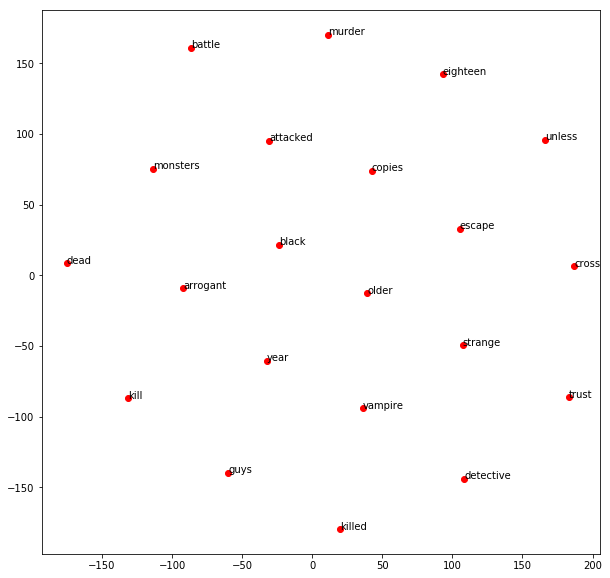

In [22]:
words = violent_words
glove_matrix, idx2word = build_glove_matrix(glove_dict)

model = TSNE(n_components=2, random_state=0)



to_plot = []

labels = []

not_found = 0

len_words = len(words)

for word in words:

    try:

        cosine_matrix = check_similarity(glove_matrix, glove_dict[word])

        ind = cosine_matrix[0].argsort()[-1:][::-1]

        closest = ind.tolist()

        tokens = [idx2word[idx] for idx in closest]

        to_reduce = build_matrix_to_tsne(glove_dict, tokens)

        #print to_reduce.shape

        labels += [token for token in tokens]

        to_plot += [x_y for x_y in to_reduce]

    except:

        len_words-=1

        print ('Word not found', word)



print (len_words)

#print to_plot.shape

#print to_plot

X_hdim = np.array(to_plot)

#print X_hdim

print (X_hdim.shape)

X = model.fit_transform(X_hdim)

X_x = np.zeros((len_words*1, 2))

labels_x = []

print (X.shape)

k=0

ranges = [x*1 for x in range (0, len_words)]

print (ranges)

for i in ranges:

    for j in range(1, 2):

        #print (i+j-1, k)

        X_x[k] = X[i+j-1]

        k+=1

        labels[i+j-1]

        labels_x.append(labels[i+j-1])

print (labels_x)

print (X_x.shape)

plt.figure(figsize=(10, 10))
plt.scatter(X_x[:,0],X_x[:,1], c='red')

for i, label in enumerate(labels_x):

    pyplot.annotate(label, (X_x[i,0],X_x[i,1]))
    
    
pyplot.show()

### Comparing Violent and Non-Violent Words in the Glove Embeddings Space

In [ ]:
words = non_violent_words
glove_matrix, idx2word = build_glove_matrix(glove_dict)

model = TSNE(n_components=2, random_state=0)


to_plot = []

labels = []

not_found = 0

len_words = len(words)

for word in words:

    try:

        cosine_matrix = check_similarity(glove_matrix, glove_dict[word])

        ind = cosine_matrix[0].argsort()[-1:][::-1]

        closest = ind.tolist()

        tokens = [idx2word[idx] for idx in closest]

        to_reduce = build_matrix_to_tsne(glove_dict, tokens)

        #print to_reduce.shape

        labels += [token for token in tokens]

        to_plot += [x_y for x_y in to_reduce]

    except:

        len_words-=1

        print ('Word not found', word)



print (len_words)

#print to_plot.shape

#print to_plot

X_hdim = np.array(to_plot)

#print X_hdim

print (X_hdim.shape)

X = model.fit_transform(X_hdim)

X_x = np.zeros((len_words*1, 2))

labels_x = []

print (X.shape)

k=0

ranges = [x*1 for x in range (0, len_words)]

print (ranges)

for i in ranges:

    for j in range(1, 2):

        #print (i+j-1, k)

        X_x[k] = X[i+j-1]

        k+=1

        labels[i+j-1]

        labels_x.append(labels[i+j-1])

print (labels_x)

print (X_x.shape)

plt.scatter(X_x[:,0],X_x[:,1], c='blue')

for i, label in enumerate(labels_x):

    pyplot.annotate(label, (X_x[i,0],X_x[i,1]))

pyplot.show()

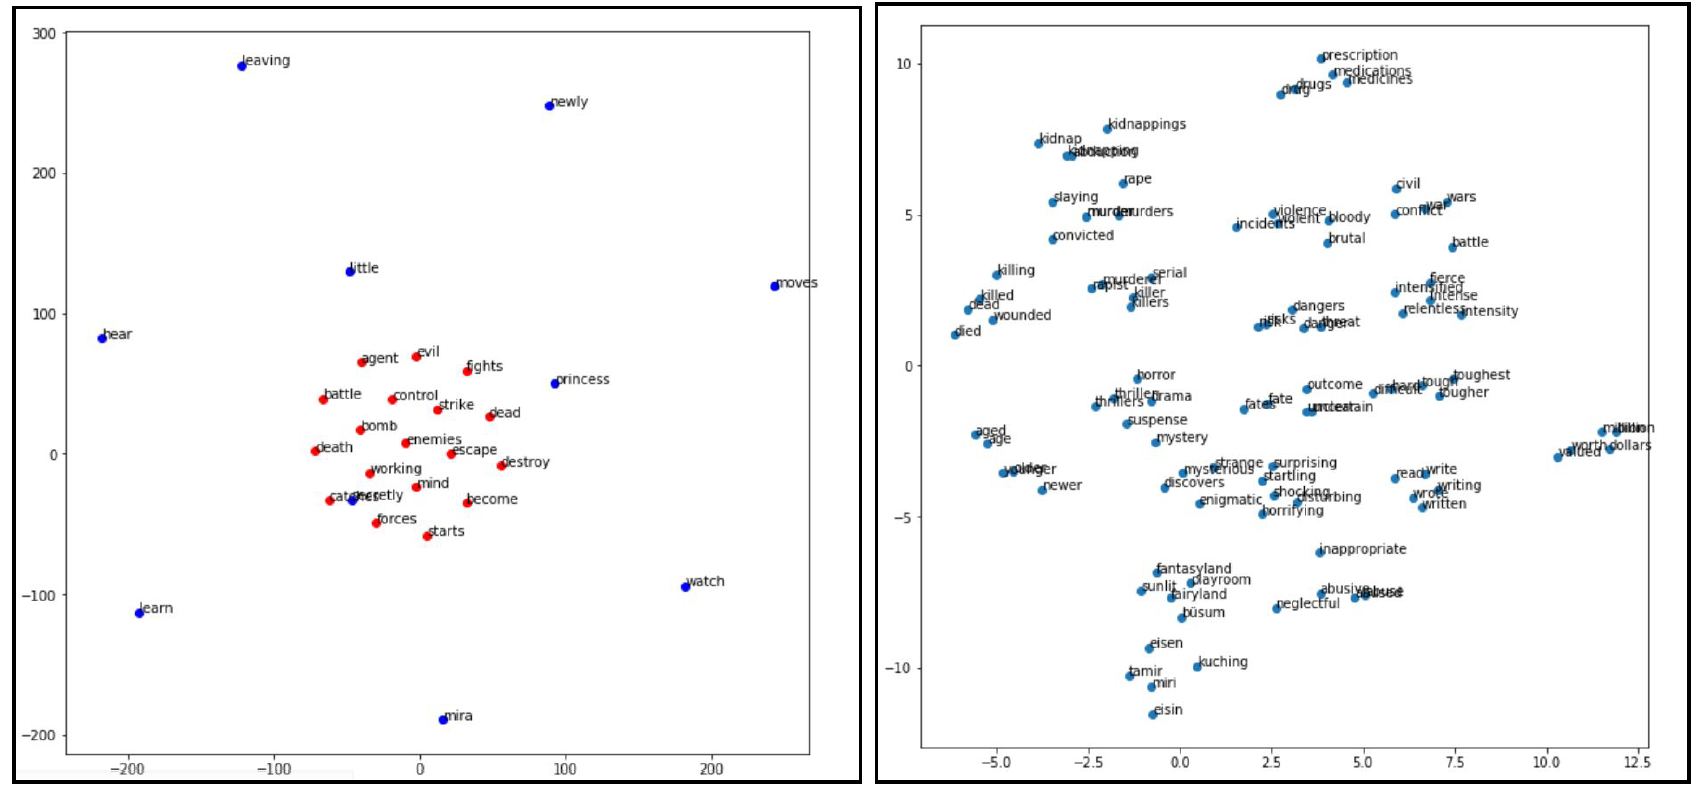

In [3]:
Image(filename="Comparing Violent and Non-Violent Words.png")